In [3]:
# Import built-in and third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings

In [4]:
# Import user-defined modules
def find_dir(dir, root=os.path.abspath('/')):
   
    cd=os.getcwd() 
    while True:
        listdir=os.listdir(cd)
        if dir in listdir:
            return cd
        elif (os.path.basename(cd)==root) or (cd==os.path.abspath('/')):
            return None
        cd=os.path.dirname(cd)


# Load user-defined utilities
import fleishman as uflsh
import format as ufrmt
import multivariate as umvar
import plottingok as uplot
import utilslab as u

In [5]:
# Warnings
# warnings.simplefilter('ignore')
warnings.simplefilter('default')

# Set Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option ('display.max_rows', 40)
pd.set_option('display.float_format', '{:f}'.format)

# Set aspects of the visual theme for all matplotlib and seaborn plots
sns.set_theme()

In [6]:
# Load radiomics dataset
dataset_dirpath = './'
dataset_filename = 'radiogenomics.csv'
dataset_filepath = os.path.join(dataset_dirpath, dataset_filename)

df = pd.read_csv(  
      filepath_or_buffer=dataset_filepath
    , sep=','
    , on_bad_lines='warn'
    , index_col=False
    , header=0
)

In [7]:
columns = ['id', 'Histology', 'Recurrence']
df.drop(columns=columns, inplace=True)

In [8]:
# Save features in dataframe X, and target in series y
target = 'Hist_binary'

X = df.drop(columns=target).copy()
y = df[target].copy()

cond = df[target] == 0

In [9]:
# Split X
X_0=X.loc[cond].copy()
X_1=X.loc[~cond].copy()

# Split y
y_0=y.loc[cond].copy()
y_1=y.loc[~cond].copy()

In [10]:
# Pre-processing
# Save minimum and maximum values for each feature
min_max_feat_0 = X_0.describe().loc[['min', 'max']]
min_max_feat_0

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
min,0.356903,0.273070,8.131851,11.023599,13.601471,13.453624,13.341664,14.247807,764.833333,10.230319,0.365721,515.017749,0.118848,786.000000,-2.447431,0.230283,335.441796,0.023354,0.008435,1.149592,0.400795,0.010069,-1.425209,-2.200592,-2.930270,1.998086,0.003546,0.409919,-24.252773,335.441796,0.500051,0.004313,1.194424,0.009115,-0.557849,0.005962,0.004900,0.100107,0.004900,0.044492,0.004875,0.839132,0.839132,0.935653,0.892755,-0.508482,0.034625,0.004900,1.080925,0.284

In [11]:
# Pre-processing
# Save minimum and maximum values for each feature
min_max_feat_1 = X_1.describe().loc[['min', 'max']]
min_max_feat_1

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
min,0.463217,0.243226,7.602185,13.278171,14.560220,15.231546,12.369317,17.720045,723.125000,10.460792,0.303034,490.727891,0.159488,737.000000,-2.621761,0.155953,210.124842,0.465978,0.017490,1.257370,0.431439,0.233750,-1.541032,-2.187039,-2.629568,2.308695,0.032328,0.533955,-3.734506,210.124842,0.500034,0.177885,1.225223,0.403366,-0.462476,0.220853,0.074464,0.143996,0.074464,0.381310,0.068823,0.868015,0.868015,0.947206,0.912010,-0.460076,0.161412,0.074464,1.096210,0.3130

In [12]:
X_0_norm = u.normalize(X_0)
X_1_norm = u.normalize(X_1)

In [13]:
X_0_norm.describe()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.00

In [14]:
X_1_norm.describe()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000

In [15]:
X_0.corr()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Elongation,1.000000,0.682308,0.108708,-0.235227,0.009827,-0.072780,-0.000172,-0.116904,0.119083,0.157303,0.292693,0.061952,-0.119892,0.118968,-0.011246,-0.228892,0.117429,-0.073219,0.060610,0.110092,-0.169022,0.004032,-0.144323,-0.156362,-0.133576,0.119744,0.025654,0.117125,-0.048671,0.117429,0.070218,0.023049,-0.110181,-0.106841,0.175728,-0.112417,-0.064205,-0.084041,-0.064205,-0.086632,-0.078234,0.064205,0.064205,0.064205,0.064205,0.034596,-0.110758,-0.

In [16]:
X_1.corr()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Elongation,1.000000,0.775588,0.199501,-0.195045,0.024421,-0.133191,-0.025073,-0.095250,0.114415,0.171341,0.247091,0.050329,-0.271377,0.114352,0.093362,-0.045933,0.082646,-0.134899,-0.089823,0.066090,0.162249,-0.104287,0.020000,0.004706,0.216255,-0.228626,-0.088502,-0.062513,-0.004226,0.082646,0.133054,-0.125365,-0.002318,-0.120841,-0.015924,-0.136084,-0.021731,-0.115572,-0.021731,-0.028061,-0.024995,0.021731,0.021731,0.021731,0.021731,0.080293,-0.133001,-

In [17]:
high_corr_thrsh=0.95

melt_corr_df_0 = u.melt_corr(X_0)
filtered_df_0 = melt_corr_df_0.loc[np.abs(melt_corr_df_0['corr_coeff'])>high_corr_thrsh]
filtered_df_0

,feat_1,feat_2,corr_coeff
316,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,0.955111
824,original_shape_MeshVolume,original_shape_VoxelVolume,1.000000
827,original_shape_MeshVolume,original_firstorder_Energy,0.950152
840,original_shape_MeshVolume,original_firstorder_TotalEnergy,0.950152
871,original_shape_MeshVolume,original_gldm_GrayLevelNonUniformity,0.992188
...,...,...,...
5481,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,-1.000000
5521,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LowGrayLevelZoneEmphasis,-1.000000
5545,original_glszm_LargeAreaEmphasis,original_glszm_ZoneVariance,0.997340
5667,original_ngtdm_Coarseness,original_ngtdm_Strength,0.999883


In [18]:
melt_corr_df_1 = u.melt_corr(X_1)
filtered_df_1 = melt_corr_df_1.loc[np.abs(melt_corr_df_1['corr_coeff'])>high_corr_thrsh]
filtered_df_1

,feat_1,feat_2,corr_coeff
217,original_shape_LeastAxisLength,original_shape_MinorAxisLength,0.951061
316,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,0.976041
420,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,0.977404
822,original_shape_MeshVolume,original_shape_SurfaceArea,0.978955
824,original_shape_MeshVolume,original_shape_VoxelVolume,1.000000
...,...,...,...
5521,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LowGrayLevelZoneEmphasis,-1.000000
5536,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,0.981143
5545,original_glszm_LargeAreaEmphasis,original_glszm_ZoneVariance,0.998874
5574,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_ZoneVariance,0.979593


In [19]:
# Assumo che sono in ordine tutte le correlazioni (non g -- a, ma a -- g) --> chiedi lorenzo
lista_feat_0 = []
lista_feat_1 = []

In [20]:
for i in range(len(filtered_df_0)):
    if filtered_df_0.iat[i, 0] not in lista_feat_0:
        lista_feat_0.append(filtered_df_0.iat[i, 0])
len(lista_feat_0)

51

In [21]:
for i in range(len(filtered_df_1)):
    if filtered_df_1.iat[i, 0] not in lista_feat_1:
        lista_feat_1.append(filtered_df_1.iat[i, 0])
len(lista_feat_1)

53

In [22]:
X_0.drop(columns=lista_feat_0, inplace=True)

In [23]:
X_1.drop(columns=lista_feat_1, inplace=True)

In [24]:
X_0_norm = u.normalize(X_0)
X_1_norm = u.normalize(X_1)

In [25]:
X_0.corr()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc1,original_glcm_Imc2,original_glcm_MCC,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Elongation,1.000000,0.682308,0.108708,0.009827,-0.072780,-0.000172,-0.116904,0.157303,0.292693,-0.119892,-0.228892,-0.169022,-0.156362,0.119744,0.117125,-0.048671,0.023049,-0.106841,0.175728,0.034596,-0.110758,-0.083822,-0.183587,0.176552,0.004123,0.133076,-0.070218,-0.035246,0.174285,0.123914,0.065846,-0.041198,0.119934,0.174055,0.057543,0.060725,0.039735,-0.115024,0.168570,0.051775,-0.074140,-0.148943,0.064897,0.086894,-0.115372,0.150373,0.167099,0.041445,0.093030,-0.069260,-0.146596,0.114687,0.082846,-0.009305,-0.039185,0.113834
original_shape_Flatness,0.682308,1.000000,0.236025,-0.092704,-0.099304,-0.100042,-0.178763,0.042866,0.521193,-0.201831,-0.194837,-0.077732,-0.291936,0.085209,0.273843,0.097163,0.112240,-0.028331,0.256770,-0.010078,-0.051693,-0.025079,-0.225768,0.242793,0.026335,0.212462,-0.028520,-0.131049,0.323991,0.256755,0.106531,-0.011884,0.128026,0.302888,0.170045,0.080736,0.049963,-0.146324,0.282780,0.098749,-0.081212,-0.176340,0.097930,0.191188,-0.232882,0.221954,0.298306,0.118485,0.198736,-0.088373,-0.255502,0.182115,0.149915,0.022119,-0.027854,0.005796
original_shape_LeastAxisLength,0.108708,0.236025,1.000000,0.852246,0.894588,0.836651,0.822484,0.939396,-0.351922,-0.819474,-0.087103,0.109957,-0.430087,-0.011461,0.449494,0.261400,0.232046,0.270109,0.290773,-0.539844,0.368368,0.481993,-0.378040,0.579213,-0.098970,0.861179,0.029404,-0.013593,0.653244,0.389726,-0.068081,-0.082179,0.404799,0.817360,0.366244,0.751244,0.855442,-0.622457,0.835089,-0.166718,-0.032692,-0.332239,0.410755,0.843272,-0.282194,0.769731,0.098269,0.529671,0.484017,0.264481,0.381639,0.167722,0.661288,0.440852,-0.217786,-0.222978
original_shape_Maximum2DDiameterColumn,0.009827,-0.092704,0.852246,1.000000,0.905801,0.920213,0.944424,0.925881,-0.593696,-0.707822,-0.016111,0.135895,-0.334211,-0.021632,0.395687,0.258555,0.271508,0.292720,0.237502,-0.489000,0.384276,0.454354,-0.212317,0.389289,0.010401,0.693106,0.107343,-0.027506,0.542046,0.342142,-0.039189,0.004307,0.263200,0.599571,0.368353,0.654189,0.831598,-0.498477,0.608906,-0.144565,0.07362

In [26]:
X_1.corr()

,original_shape_Elongation,original_shape_Flatness,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Kurtosis,original_firstorder_Median,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_MCC,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceVariance,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Elongation,1.000000,0.775588,-0.133191,-0.025073,-0.095250,0.171341,0.247091,-0.271377,0.093362,-0.045933,0.066090,0.004706,-0.228626,-0.088502,-0.062513,-0.125365,-0.120841,-0.015924,-0.115572,-0.125763,-0.128854,0.076763,-0.038157,-0.133054,0.101334,0.078747,0.021260,0.033191,-0.130516,-0.068997,0.126295,-0.018648,0.112761,-0.121947,-0.176843,0.066593,-0.123467,-0.075451,-0.143033,-0.272243,0.123887,-0.147972,0.074777,0.074663,0.034897,0.063607,-0.042963,-0.005984,0.069516,0.130122,-0.182884,-0.026147,-0.072471,-0.044189
original_shape_Flatness,0.775588,1.000000,-0.086662,-0.031816,-0.087075,0.108761,0.358739,-0.399528,-0.191978,-0.207296,-0.068101,-0.246415,0.031519,0.126604,0.252290,0.144827,0.020087,0.209354,0.053043,-0.160035,-0.236311,0.137732,0.016194,-0.099137,-0.013973,0.312815,0.223492,-0.032370,-0.222849,0.104372,0.188844,0.130654,0.282199,-0.299985,-0.359788,0.214287,-0.219800,-0.107325,-0.298855,-0.266986,0.134554,-0.321176,0.076293,0.097463,0.031300,0.139004,-0.209947,-0.004067,0.106293,0.184015,0.022289,-0.176070,-0.129602,-0.091186
original_shape_Maximum2DDiameterRow,-0.133191,-0.086662,1.000000,0.903689,0.863691,0.912872,-0.648194,-0.736236,-0.316606,-0.241254,-0.268098,-0.278031,0.167802,0.287369,0.371580,0.292560,0.197936,0.272507,0.435040,0.045887,-0.317959,0.722296,0.074964,0.081920,0.121576,0.513238,0.344819,-0.121596,-0.106119,0.421965,0.601793,0.393971,0.779919,-0.425935,-0.686208,0.570242,-0.166712,-0.269701,0.081774,-0.252686,0.751030,-0.358338,0.801365,-0.096654,0.479430,0.494695,0.202821,0.516243,0.071625,0.773295,0.505056,-0.387142,-0.249703,-0.564402
original_shape_Maximum2DDiameterSlice,-0.025073,-0.031816,0.903689,1.000000,0.878124,0.921663,-0.683495,-0.736975,-0.272353,-0.182304,-0.297253,-0.132413,0.075286,0.233376,0.215657,0.202774,0.166170,0.153180,0.357783,0.158229,-0.134181,0.655024,0.101720,0.161464,0.175609,0.386192,0.261831,-0.050657,0.034983,0.453104,0.507275,0.432499,0.736897,-0.348944,-0.582983,0.427051,-0.091323,-0.294752,0.285612,-0.213648,0.753007,-0.300443,0.808533,-0.183642,0.480333,0.454622,0.288968,0.640913,0.143755,0.718743,0.399680,-0

In [27]:
# Check
melt_corr_df_0 = u.melt_corr(X_0)
filtered_df_00 = melt_corr_df_0.loc[np.abs(melt_corr_df_0['corr_coeff'])>high_corr_thrsh]
filtered_df_00

,feat_1,feat_2,corr_coeff


In [28]:
# Check
melt_corr_df_1 = u.melt_corr(X_1)
filtered_df_01 = melt_corr_df_1.loc[np.abs(melt_corr_df_1['corr_coeff'])>high_corr_thrsh]
filtered_df_01

,feat_1,feat_2,corr_coeff


In [29]:
target='Hist_binary'

target_corr_df=df.corr()[[target]].iloc[:-1].sort_values(by=target, ascending=False)
target_corr_df

,Hist_binary
original_gldm_SmallDependenceHighGrayLevelEmphasis,0.306653
original_gldm_SmallDependenceEmphasis,0.302281
original_gldm_LowGrayLevelEmphasis,0.297383
original_glszm_HighGrayLevelZoneEmphasis,0.295807
original_glcm_ClusterShade,0.293627
...,...
original_glszm_LowGrayLevelZoneEmphasis,-0.295807
original_gldm_HighGrayLevelEmphasis,-0.297383
original_glcm_SumAverage,-0.299660
original_glcm_JointAverage,-0.299660


In [30]:
low_corr_thrsh=0.01

target_corr_df.loc[np.abs(target_corr_df['Hist_binary'])<low_corr_thrsh]

,Hist_binary
original_gldm_DependenceNonUniformity,0.007255
original_shape_SurfaceVolumeRatio,-0.005967
original_shape_Elongation,-0.006601
original_glcm_Correlation,-0.007503
original_glcm_MCC,-0.007740


In [31]:
lista_low = target_corr_df.loc[np.abs(target_corr_df['Hist_binary'])<low_corr_thrsh]

In [32]:
for feature in lista_low.axes[0].tolist():
    if feature in X_0.axes[1].tolist():
        X_0.drop(columns = feature, inplace = True)
        
X_0

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.481237,8.963171,20.000000,19.697716,17.262677,23.345235,12.943898,0.648684,0.508785,0.513958,0.473524,2.574118,1.068895,-0.768836,1.047577,0.678778,-0.025348,-0.102377,0.409092,5.295078,0.050038,30.946873,683.087680,0.241841,603.638700,163.664210,0.557256,0.032456,0.004976,18.761785,4.570311,0.493529,2.967303,195.966011,0.467062,2.446712,1.807652,0.238556,0.240000,542767.600000,88800.850000,0.550000,1.400000,0.280000,0.450001,1.200002,0.262501,2.321928,0.003779,109581.040000,132.498906,0.073420,0.004980
1,0.656833,12.548555,19.849433,24.698178,20.518285,24.779023,13.996240,0.704976,0.387717,0.400795,-0.305450,3.331065,1.209699,-0.653192,1.075648,0.694786,0.271356,-0.102160,0.394095,5.081770,0.047129,44.406488,1137.957028,0.245310,489.820949,262.068039,0.676365,0.030916,0.004301,18.995670,9.157077,0.527321,3.059661,287.269255,0.414469,4.805550,1.815440,0.237144,0.109375,656680.500000,230054.250000,0.343750,2.000000,0.250000,0.451389,1.805556,0.112847,2.155639,0.003581,237398.937500,559.922433,0.073348,0.002994
2,0.657195,11.036269,15.264338,20.396078,20.248457,21.908902,12.094665,0.741714,0.436055,0.470867,-1.255896,2.795833,1.482543,0.281601,0.983137,0.527083,0.324180,-0.084167,0.282672,4.472588,0.073078,60.782751,963.665292,0.168844,429.610997,386.386770,0.838660,0.043098,0.005038,21.052801,16.513197,0.626081,3.076713,135.098864,0.335289,7.701360,1.777853,0.213045,0.098765,182135.111100,147233.861100,0.333333,2.333333,0.259259,0.485063,1.940252,0.121266,2.281036,0.006186,128078.000000,202.513315,0.036734,0.006318
4,0.671483,18.349358,30.413813,28.442925,32.557641,34.234486,21.467688,0.691737,0.580399,0.586389,-0.980267,2.370904,1.223480,0.275030,0.933264,0.589778,0.294604,-0.042450,0.249299,4.998630,0.044581,46.526065,3996.888780,0.219359,433.500492,302.053012,0.756284,0.039562,0.004593,18.945253,12.333574,0.582283,3.142179,879.747890,0.392793,6.959142,1.818763,0.259732,0.039931,1829212.708000,1016952.708000,0.281250,9.500000,0.395833,0.596354,2.385417,0.149089,1.603759,0.003370,1091368.873000,22123.809150,0.070098,0.000879
5,0.612866,14.859981,27.856777,26.925824,27.294688,31.208973,20.152377,0.589065,0.504866

In [33]:
pd.set_option('display.max_rows', 10)

for feature in lista_low.axes[0].tolist():
    if feature in X_1.axes[1].tolist():
        X_1.drop(columns = feature, inplace = True)
        
X_1

,original_shape_Flatness,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Kurtosis,original_firstorder_Median,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceVariance,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
3,0.387075,24.207437,18.867962,25.514702,13.736166,0.564827,-1.948213,0.524183,1.447629,-0.996245,2.498024,0.777141,1.262871,0.921414,0.720432,0.412172,0.171254,5.060750,54.044600,0.207965,410.911872,305.275492,0.778769,0.051722,0.006158,0.249202,15.760823,0.613195,3.041275,0.286102,0.403720,4.735983,0.537331,1.711971,0.243671,0.098765,169391.555600,0.333333,2.333333,0.259259,0.485226,1.940905,0.121307,2.281036,0.006555,97160.024690,654.466154,0.219413,0.048250,0.006278
6,0.801424,16.643317,16.552945,18.411953,12.646897,0.684247,-2.156685,0.486097,1.441337,-0.788580,2.670226,0.805340,1.266950,1.011605,0.717595,0.386940,0.190947,5.071603,54.557270,0.223311,444.413557,306.020564,0.747525,0.047190,0.005606,0.244129,17.318126,0.571110,3.029321,0.293308,0.395864,4.955083,0.549280,1.810528,0.233968,0.098765,125220.555600,0.333333,1.666667,0.185185,0.377906,1.511624,0.094477,2.641604,0.006855,73241.654320,8249.367201,0.248825,0.057857,0.005879
8,0.697932,81.437092,61.000000,85.188027,49.449133,0.589115,-2.111205,0.394785,3.387925,-2.109362,2.625888,0.495854,1.785584,0.813529,0.715908,0.411808,0.093026,2.904971,33.810097,0.115684,673.891860,570.895623,0.899868,0.015176,0.002586,0.247938,198.827244,0.591852,4.231644,0.182589,0.130179,124.366727,0.427915,1.439238,0.175084,0.053110,28415135.400000,0.292208,100.835498,0.436517,0.685124,2.665921,0.189925,2.050772,0.002570,26622682.230000,2967.075341,0.079163,0.009695,0.000266
9,0.568625,52.497619,35.171011,52.535702,23.802059,0.603528,-2.119317,0.507782,1.671104,-2.116676,2.643419,0.915056,1.672727,1.252662,0.928634,0.537238,0.163867,4.060478,45.101055,0.194290,654.006410,447.226948,0.802022,0.014101,0.002428,0.238775,57.647716,0.547715,3.750941,0.190375,0.228500,25.063983,0.428588,1.522418,0.155130,0.098765,13435018.670000,0.333333,2.555556,0.283951,0.500567,2.002268,0.125142,2.058814,0.000740,8215012.000000,1974.532552,0.135067,0.027690,0.001153
16,0.693112,57.271284,55.569776,58.634461,43.528552,0.655686,-2.188416,0.486420,1.849683,-2.187039,2.697848,0.895375,1.771868,1.291077,1.065716,0.614631,0.168381,3.517814,33.601824,0.188163,832.915840,502.901251,0.811503,0.012795,0.002200,0.234918,155.941229,0.533909,4.328889,0.150893,0.148592,71.371374,0.383689,1.380321,0.134531,0.056

In [34]:
X_0_norm = u.normalize(X_0)
X_1_norm = u.normalize(X_1)

In [35]:
X_0.corr()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc1,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Flatness,1.000000,0.236025,-0.092704,-0.099304,-0.100042,-0.178763,0.042866,0.521193,-0.194837,-0.077732,-0.291936,0.085209,0.273843,0.097163,0.112240,-0.028331,0.256770,-0.010078,-0.051693,-0.225768,0.242793,0.026335,0.212462,-0.028520,-0.131049,0.323991,0.256755,0.106531,-0.011884,0.128026,0.302888,0.170045,0.080736,0.049963,-0.146324,0.282780,0.098749,-0.081212,-0.176340,0.097930,0.191188,-0.232882,0.221954,0.298306,0.118485,0.198736,-0.088373,-0.255502,0.182115,0.149915,0.022119,-0.027854,0.005796
original_shape_LeastAxisLength,0.236025,1.000000,0.852246,0.894588,0.836651,0.822484,0.939396,-0.351922,-0.087103,0.109957,-0.430087,-0.011461,0.449494,0.261400,0.232046,0.270109,0.290773,-0.539844,0.368368,-0.378040,0.579213,-0.098970,0.861179,0.029404,-0.013593,0.653244,0.389726,-0.068081,-0.082179,0.404799,0.817360,0.366244,0.751244,0.855442,-0.622457,0.835089,-0.166718,-0.032692,-0.332239,0.410755,0.843272,-0.282194,0.769731,0.098269,0.529671,0.484017,0.264481,0.381639,0.167722,0.661288,0.440852,-0.217786,-0.222978
original_shape_Maximum2DDiameterColumn,-0.092704,0.852246,1.000000,0.905801,0.920213,0.944424,0.925881,-0.593696,-0.016111,0.135895,-0.334211,-0.021632,0.395687,0.258555,0.271508,0.292720,0.237502,-0.489000,0.384276,-0.212317,0.389289,0.010401,0.693106,0.107343,-0.027506,0.542046,0.342142,-0.039189,0.004307,0.263200,0.599571,0.368353,0.654189,0.831598,-0.498477,0.608906,-0.144565,0.073624,-0.245969,0.311903,0.680873,-0.217401,0.619571,0.002796,0.521257,0.437375,0.323807,0.501164,0.141805,0.524078,0.461716,-0.137693,-0.234424
original_shape_Maximum2DDiameterRow,-0.099304,0.894588,0.905801,1.000000,0.895416,0.922734,0.939593,-0.619338,0.016347,0.155912,-0.284620,-0.042735,0.361834,0.260252,0.262477,0.333084,0.189448,-0.565179,0.454388,-0.202408,0.403292,-0.041949,0.722821,0.125051,0.001736,0.526495,0.310953,-0.069385,-0.027489,0.288912,0.622825,0.331207,0.699732,0.850331,-0.521466,0.638446,-0.162803,0.036737,-0.220172,0.338980,0.710140,-0.231296,0.639624,0.018183,0.533440,0.449611,0.328092,0.515047,0.126850,0.556475,0.422005,-0.145325,-0.242113
original_shape_Maximum2DDiameterSlice,-0.100042

In [36]:
X_1.corr()

,original_shape_Flatness,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Kurtosis,original_firstorder_Median,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceVariance,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Flatness,1.000000,-0.086662,-0.031816,-0.087075,0.108761,0.358739,-0.191978,-0.207296,-0.068101,-0.246415,0.031519,0.126604,0.252290,0.144827,0.020087,0.209354,-0.160035,-0.236311,0.016194,-0.099137,-0.013973,0.312815,0.223492,-0.032370,-0.222849,0.104372,0.188844,0.130654,0.282199,-0.299985,-0.359788,0.214287,-0.219800,-0.107325,-0.298855,-0.266986,0.134554,-0.321176,0.076293,0.097463,0.031300,0.139004,-0.209947,-0.004067,0.106293,0.184015,0.022289,-0.176070,-0.129602,-0.091186
original_shape_Maximum2DDiameterRow,-0.086662,1.000000,0.903689,0.863691,0.912872,-0.648194,-0.316606,-0.241254,-0.268098,-0.278031,0.167802,0.287369,0.371580,0.292560,0.197936,0.272507,0.045887,-0.317959,0.074964,0.081920,0.121576,0.513238,0.344819,-0.121596,-0.106119,0.421965,0.601793,0.393971,0.779919,-0.425935,-0.686208,0.570242,-0.166712,-0.269701,0.081774,-0.252686,0.751030,-0.358338,0.801365,-0.096654,0.479430,0.494695,0.202821,0.516243,0.071625,0.773295,0.505056,-0.387142,-0.249703,-0.564402
original_shape_Maximum2DDiameterSlice,-0.031816,0.903689,1.000000,0.878124,0.921663,-0.683495,-0.272353,-0.182304,-0.297253,-0.132413,0.075286,0.233376,0.215657,0.202774,0.166170,0.153180,0.158229,-0.134181,0.101720,0.161464,0.175609,0.386192,0.261831,-0.050657,0.034983,0.453104,0.507275,0.432499,0.736897,-0.348944,-0.582983,0.427051,-0.091323,-0.294752,0.285612,-0.213648,0.753007,-0.300443,0.808533,-0.183642,0.480333,0.454622,0.288968,0.640913,0.143755,0.718743,0.399680,-0.220709,-0.115850,-0.618266
original_shape_Maximum3DDiameter,-0.087075,0.863691,0.878124,1.000000,0.867321,-0.629810,-0.293866,-0.160970,-0.286205,-0.210284,0.115694,0.239505,0.273021,0.214012,0.188223,0.237598,0.081106,-0.181303,0.154827,0.114721,0.106463,0.444880,0.323558,-0.050465,0.023633,0.473403,0.486456,0.455294,0.713401,-0.344672,-0.595275,0.446178,-0.083364,-0.253709,0.235569,-0.201343,0.692109,-0.315819,0.760160,-0.132554,0.476949,0.464515,0.259541,0.577427,0.132449,0.672923,0.391761,-0.259821,-0.160621,-0.577616
original_shape_MinorAxisLength,0.108761,0.912872,0.921663,0.867321,1.000000,-0.580710,-0.268439,-0.202513,-0.263041,-0.243632,0.051007,0.230072,0.296210,0.207960,0.145725,0.238215,0.044702,-0.297140,0.088549,0.070300,0.140297,0.491556,0.337692,

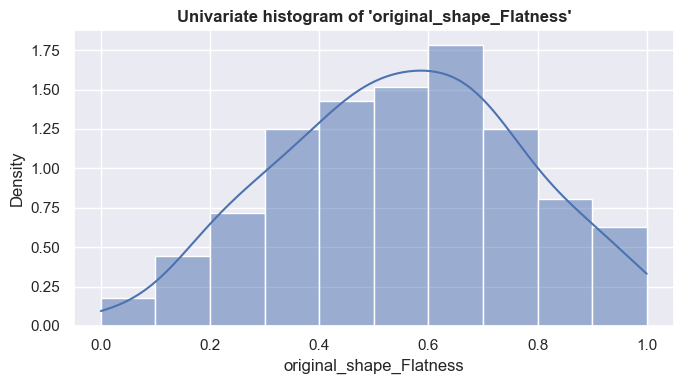

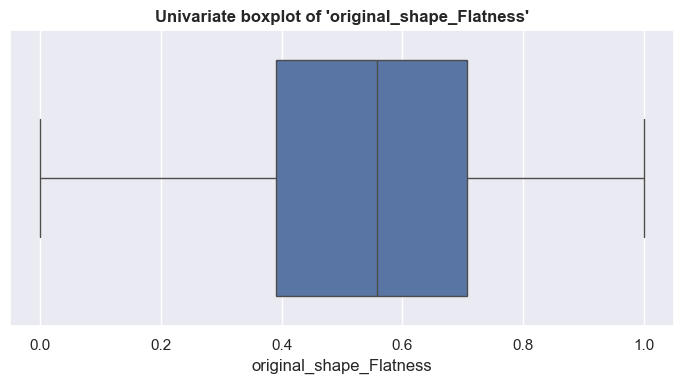

In [37]:
# Simulation
# Extract and visualize sample
feature = 'original_shape_Flatness'

uplot.histogram(data=X_0_norm, feature=feature, bins=10, kde=True)
uplot.boxplot(data=X_0_norm, feature=feature)

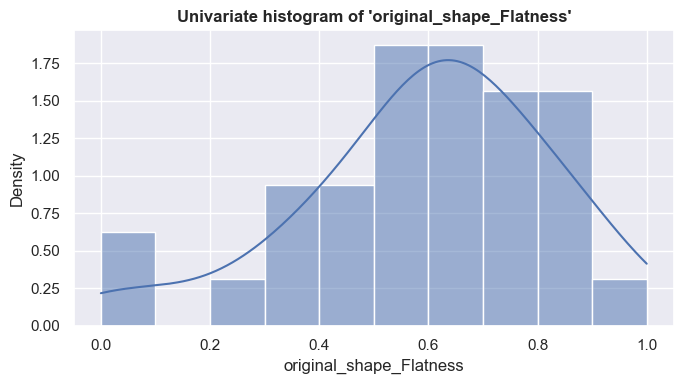

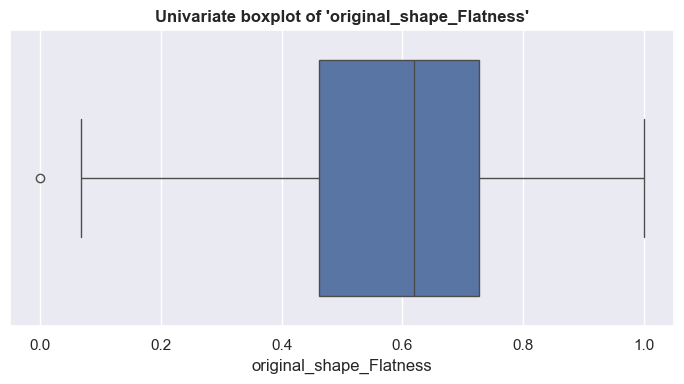

In [38]:
uplot.histogram(data=X_1_norm, feature=feature, bins=10, kde=True)
uplot.boxplot(data=X_1_norm, feature=feature)

In [39]:
# Compute and print sample statistics
sample_0 = X_0_norm[feature].values
sample_mvsk_0 = umvar.mvsk(sample_0)

for key in sample_mvsk_0.keys():
    print(f'{key}:\t{np.round(sample_mvsk_0[key], 5)}')

mean:	0.5536
var:	0.04778
skew:	-0.08158
ekurt:	-0.51378


In [40]:
# Compute and print sample statistics
sample_1 = X_1_norm[feature].values
sample_mvsk_1 = umvar.mvsk(sample_1)

for key in sample_mvsk_1.keys():
    print(f'{key}:\t{np.round(sample_mvsk_1[key], 5)}')

mean:	0.59246
var:	0.05273
skew:	-0.76433
ekurt:	0.68952


In [41]:
size = int(10e4) # This variable sets the size of the simulated sample

# Create an instance of the Fleishman class
ff_0 = uflsh.Fleishman(
    mean=sample_mvsk_0['mean']
  , var=sample_mvsk_0['var']
  , skew=sample_mvsk_0['skew']
  , ekurt=sample_mvsk_0['ekurt']
  , size=size
  , verbose=1
)

In [42]:
size = int(10e4) # This variable sets the size of the simulated sample

# Create an instance of the Fleishman class
ff_1 = uflsh.Fleishman(
    mean=sample_mvsk_1['mean']
  , var=sample_mvsk_1['var']
  , skew=sample_mvsk_1['skew']
  , ekurt=sample_mvsk_1['ekurt']
  , size=size
  , verbose=1
)

In [43]:
# Generate the field
ff_0.gen_field()
fl_sample_0 = ff_0.field

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 165
         Function evaluations: 301


In [44]:
# Generate the field
ff_1.gen_field()
fl_sample_1 = ff_1.field

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 130
         Function evaluations: 237


In [45]:
# Store the generated sample into a DataFrame
X_0_fl = pd.DataFrame(fl_sample_0, columns=[feature])

# Print minimum and maximum value
print(X_0_fl.min().iloc[0])
print(X_0_fl.max().iloc[0])

-0.0576755009038753
1.080465230371522


In [46]:
# Store the generated sample into a DataFrame
X_1_fl = pd.DataFrame(fl_sample_1, columns=[feature])

# Print minimum and maximum value
print(X_1_fl.min().iloc[0])
print(X_1_fl.max().iloc[0])

-0.8821744695812374
1.0111036589629387


In [47]:
# Normalize generated data
X_0_fl_norm = u.normalize(X_0_fl)
X_1_fl_norm = u.normalize(X_1_fl)

In [48]:
# Extract the normalized values of the generated sample
fl_sample_0 = X_0_fl_norm[feature].values
fl_sample_0

array([0.60300828, 0.32694184, 0.69197892, ..., 0.82708682, 0.50831339,
       0.67325537])

In [49]:
# Extract the normalized values of the generated sample
fl_sample_1 = X_1_fl_norm[feature].values
fl_sample_1

array([0.83018793, 0.65263083, 0.87623846, ..., 0.93834295, 0.77604093,
       0.86690232])

In [50]:
# Compute sample statistics of the normalized generated sample
fl_sample_mvsk_0 = umvar.mvsk(fl_sample_0)
fl_sample_mvsk_0

{'mean': 0.5362163777089902,
 'var': 0.03707969403572914,
 'skew': -0.07597598305377037,
 'ekurt': -0.5069089630276076}

In [51]:
# Compute sample statistics of the normalized generated sample
fl_sample_mvsk_1 = umvar.mvsk(fl_sample_1)
fl_sample_mvsk_1

{'mean': 0.7782495164508776,
 'var': 0.01483082433785302,
 'skew': -0.7672400744015633,
 'ekurt': 0.7112757038440995}

In [52]:
# Compare statistics
print('\tOriginal\tSynthetic')
print('\t--------\t---------')
for key in sample_mvsk_0.keys():
    print(f'{key}\t{np.round(sample_mvsk_0[key], 5)} \t{np.round(fl_sample_mvsk_0[key], 5)}')

	Original	Synthetic
	--------	---------
mean	0.5536 	0.53622
var	0.04778 	0.03708
skew	-0.08158 	-0.07598
ekurt	-0.51378 	-0.50691


In [53]:
# Compare statistics
print('\tOriginal\tSynthetic')
print('\t--------\t---------')
for key in sample_mvsk_1.keys():
    print(f'{key}\t{np.round(sample_mvsk_1[key], 5)} \t{np.round(fl_sample_mvsk_1[key], 5)}')

	Original	Synthetic
	--------	---------
mean	0.59246 	0.77825
var	0.05273 	0.01483
skew	-0.76433 	-0.76724
ekurt	0.68952 	0.71128


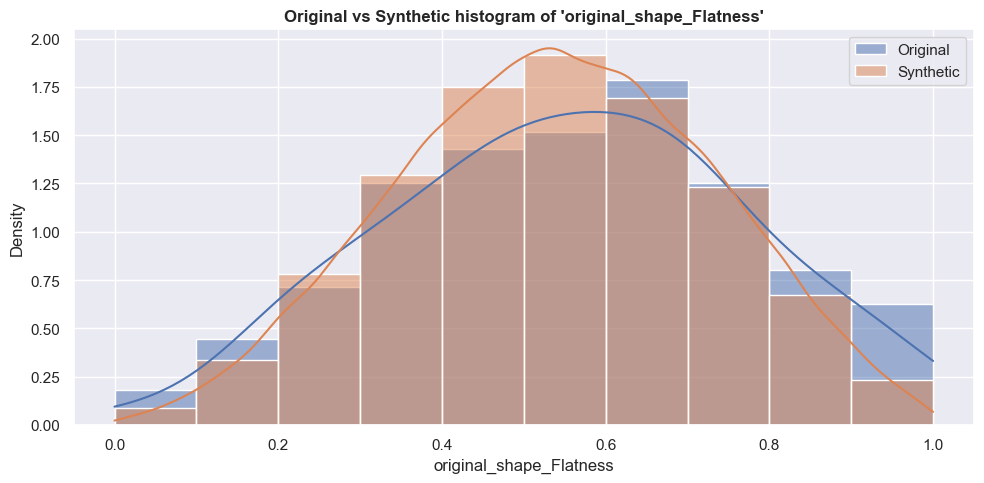

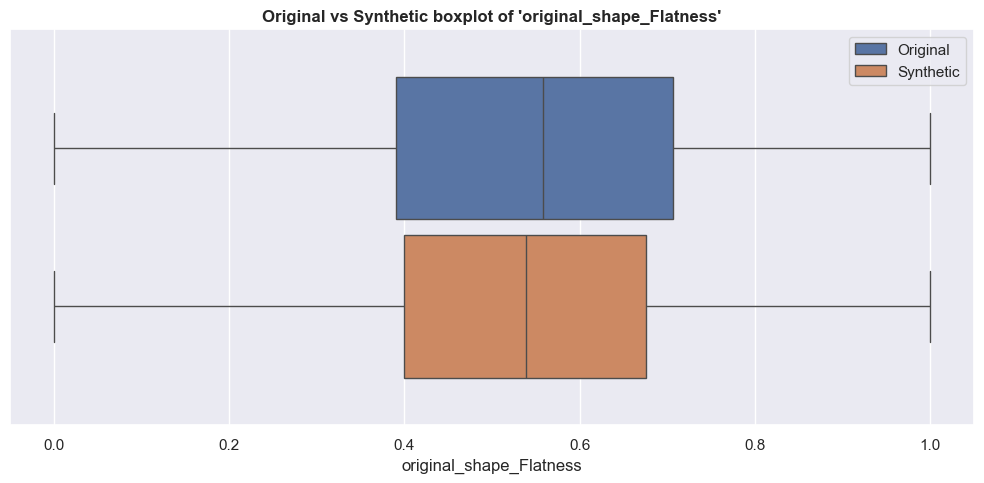

In [54]:
# Plot histograms and boxplots
uplot.sdg_histogram(
    data1=X_0_norm, data2=X_0_fl_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_0_norm, data2=X_0_fl_norm, 
    feature1=feature, feature2=feature)

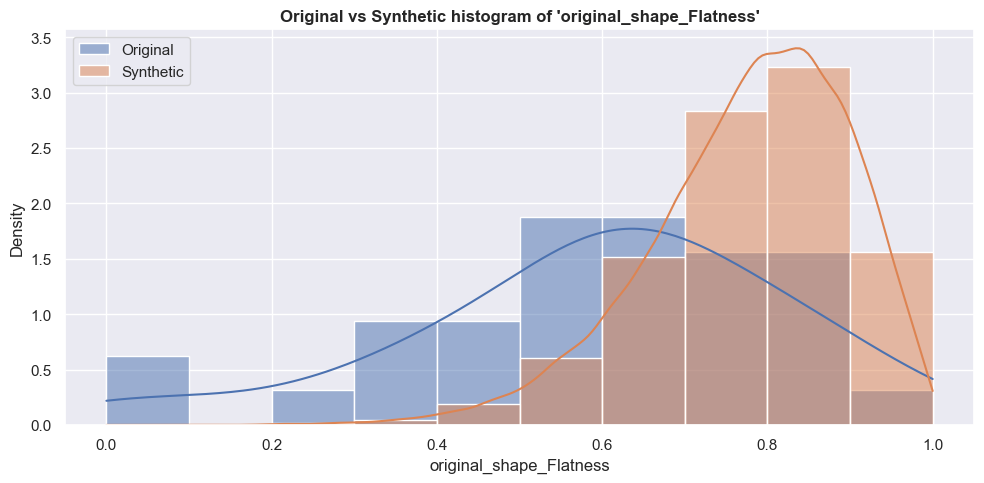

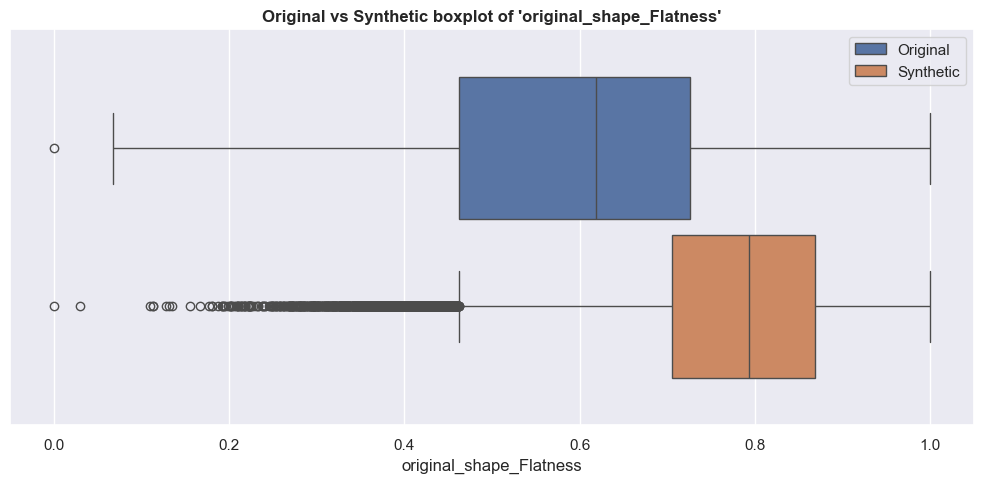

In [55]:
# Plot histograms and boxplots
uplot.sdg_histogram(
    data1=X_1_norm, data2=X_1_fl_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_1_norm, data2=X_1_fl_norm, 
    feature1=feature, feature2=feature)

In [59]:
# Simulate two correlated non-normal variables
# Extract sample values
features_0 = ['original_shape_LeastAxisLength', 'original_shape_Flatness']

sample_0 = ufrmt.to_array(X_0_norm[features_0])
n_var_0 = X_0.shape[0]

In [91]:
# Simulate two correlated non-normal variables
# Extract sample values
features_1 = ['original_glszm_ZoneVariance', 'original_shape_Flatness']

sample_1 = ufrmt.to_array(X_1_norm[features_1])
n_var_1 = X_1.shape[0]

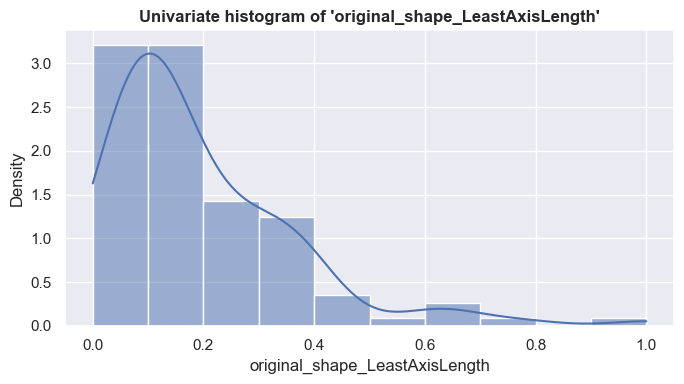

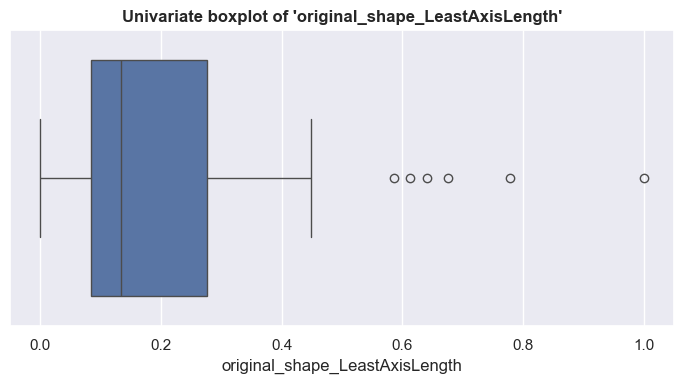

In [93]:
featureII_0 = 'original_shape_LeastAxisLength'

uplot.histogram(data=X_0_norm, feature=featureII_0, bins=10, kde=True)
uplot.boxplot(data=X_0_norm, feature=featureII_0)

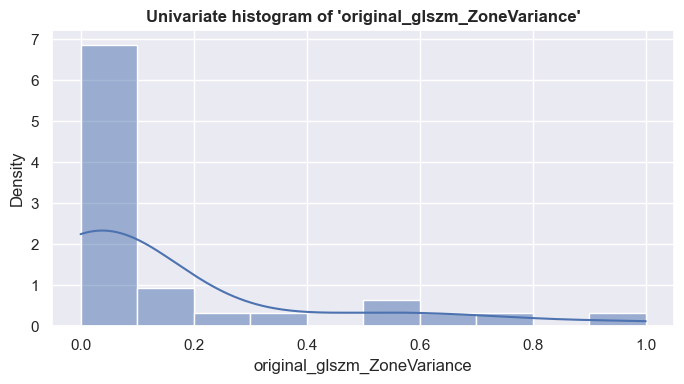

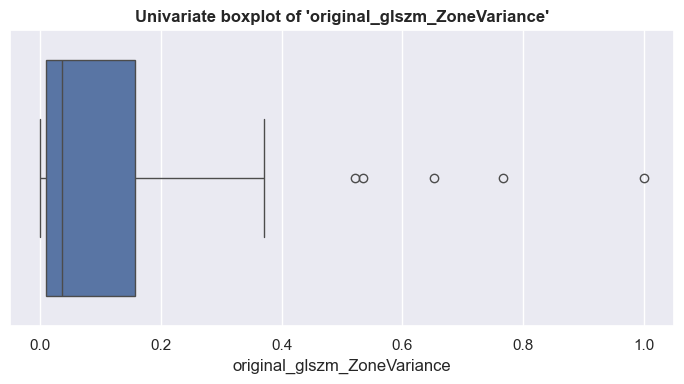

In [95]:
featureII_1 = 'original_glszm_ZoneVariance'

uplot.histogram(data=X_1_norm, feature=featureII_1, bins=10, kde=True)
uplot.boxplot(data=X_1_norm, feature=featureII_1)

In [97]:
# Compute sample statistics
mean_0, cov_0, var_0, corr_0, skew_0, ekurt_0 = umvar.mvsk(
    sample_0, ddof=1, bias=False, axis=1, 
    shrink_method='basic', shrinkage=1e-5, 
    to_tuple=True)

In [99]:
# Compute sample statistics
mean_1, cov_1, var_1, corr_1, skew_1, ekurt_1 = umvar.mvsk(
    sample_1, ddof=1, bias=False, axis=1, 
    shrink_method='basic', shrinkage=1e-5, 
    to_tuple=True)

In [101]:
# Simulate two correlated non-normal variables
size = int(10e4)

vm_sample_0 = umvar.multivariate_non_normal(
    mean=mean_0
  , cov=cov_0
  , skew=skew_0
  , ekurt=ekurt_0
  , size=size
  , random_state=42
)

In [103]:
# Simulate two correlated non-normal variables
size = int(10e4)

vm_sample_1 = umvar.multivariate_non_normal(
    mean=mean_1
  , cov=cov_1
  , skew=skew_1
  , ekurt=ekurt_1
  , size=size
  , random_state=42
)

/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.16
	vari: 0.07
	skew: 2.02
The value of [ekurt] must be >= [5.3359]
Using [ekurt] threshold value.
  warnings.warn(


In [105]:
# Normalize synthetic sample
X_0_vm = pd.DataFrame(vm_sample_0.T, columns=features_0)
X_0_vm_norm = u.normalize(X_0_vm)
vm_sample_0 = X_0_vm_norm[features_0].values.T

In [107]:
# Normalize synthetic sample
X_1_vm = pd.DataFrame(vm_sample_1.T, columns=features_1)
X_1_vm_norm = u.normalize(X_1_vm)
vm_sample_1 = X_1_vm_norm[features_1].values.T

In [109]:
# Compute and compare sample statistics
umvar.mvsk_compare(X_0_norm[features_0], X_0_vm_norm, side_by_side=True)

mean                var            \
                               Original Synthetic Original Synthetic   
original_shape_LeastAxisLength 0.194805  0.077800 0.029462  0.007572   
original_shape_Flatness        0.553605  0.535740 0.047782  0.036875   

                                    skew               ekurt            
                                Original Synthetic  Original Synthetic  
original_shape_LeastAxisLength  1.887475  1.866663  4.843893  4.646888  
original_shape_Flatness        -0.081575 -0.077221 -0.513781 -0.518846

In [111]:
# Compute and compare sample statistics
umvar.mvsk_compare(X_1_norm[features_1], X_1_vm_norm, side_by_side=True)

mean                var                skew  \
                            Original Synthetic Original Synthetic  Original   
original_glszm_ZoneVariance 0.157859  0.075728 0.066237  0.008288  2.017876   
original_shape_Flatness     0.592456  0.783963 0.052730  0.013948 -0.764329   

                                         ekurt            
                            Synthetic Original Synthetic  
original_glszm_ZoneVariance  2.002547 3.360825  5.171007  
original_shape_Flatness     -0.750766 0.689520  0.626692

In [113]:
# Compute and compare correlation coefficients
rho_0 = X_0_norm[features_0].corr().iloc[0, 1]
rho_vm_0 = X_0_vm_norm.corr().iloc[0, 1]

print('\tOriginal\tSynthetic')
print('\t--------\t---------')
print(f'rho\t{np.round(rho_0, 5)} \t{np.round(rho_vm_0, 5)}')

	Original	Synthetic
	--------	---------
rho	0.23602 	0.2381


In [115]:
# Compute and compare correlation coefficients
rho_1 = X_1_norm[features_1].corr().iloc[0, 1]
rho_vm_1 = X_1_vm_norm.corr().iloc[0, 1]

print('\tOriginal\tSynthetic')
print('\t--------\t---------')
print(f'rho\t{np.round(rho_1, 5)} \t{np.round(rho_vm_1, 5)}')

	Original	Synthetic
	--------	---------
rho	0.18401 	0.18514


In [117]:
# Simulate all features
# Extract sample values
features_0 = X_0_norm.columns.tolist()

sample_0 = ufrmt.to_array(X_0_norm[features_0])
n_var_0 = X_0.shape[0]

In [119]:
# Extract sample values
features_1 = X_1_norm.columns.tolist()

sample_1 = ufrmt.to_array(X_1_norm[features_1])
n_var_1 = X_1.shape[0]

In [121]:
# Compute sample statistics
mean_0, cov_0, var_0, corr_0, skew_0, ekurt_0 = umvar.mvsk(
    sample_0, ddof=1, bias=False, axis=1, 
    shrink_method='basic', shrinkage=1e-5, 
    to_tuple=True)

In [123]:
# Compute sample statistics
mean_1, cov_1, var_1, corr_1, skew_1, ekurt_1 = umvar.mvsk(
    sample_1, ddof=1, bias=False, axis=1, 
    shrink_method='basic', shrinkage=1e-5, 
    to_tuple=True)

In [125]:
# Simulate all features
size = int(10e4)

vm_sample_0 = umvar.multivariate_non_normal(
    mean=mean_0
  , cov=cov_0
  , skew=skew_0
  , ekurt=ekurt_0
  , size=size
  , random_state=42
)

/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.80
	vari: 0.06
	skew: -1.58
The value of [ekurt] must be >= [2.8529]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.87
	vari: 0.02
	skew: -3.88
The value of [ekurt] must be >= [22.7602]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.69
	vari: 0.05
	skew: -1.40
The value of [ekurt] must be >= [1.9674]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.44
	vari: 0.08
	skew: 0.32
The value of [ekurt] must be >= [-0.9718]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.70
	vari: 0.06
	skew: -1.15
The value of [ekurt] mu

In [127]:
# Simulate all features
size = int(10e4)

vm_sample_1 = umvar.multivariate_non_normal(
    mean=mean_1
  , cov=cov_1
  , skew=skew_1
  , ekurt=ekurt_1
  , size=size
  , random_state=42
)

/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.32
	vari: 0.08
	skew: 1.07
The value of [ekurt] must be >= [0.6779]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.31
	vari: 0.07
	skew: 0.98
The value of [ekurt] must be >= [0.3791]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.28
	vari: 0.04
	skew: 2.23
The value of [ekurt] must be >= [6.7555]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.10
	vari: 0.04
	skew: 3.72
The value of [ekurt] must be >= [20.8720]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.68
	vari: 0.06
	skew: -1.32
The value of [ekurt] must b

In [129]:
# Normalize synthetic sample
X_0_vm = pd.DataFrame(vm_sample_0.T, columns=features_0)
X_0_vm_norm = u.normalize(X_0_vm)
vm_sample_0 = X_0_vm_norm[features_0].values.T

In [131]:
# Normalize synthetic sample
X_1_vm = pd.DataFrame(vm_sample_1.T, columns=features_1)
X_1_vm_norm = u.normalize(X_1_vm)
vm_sample_1 = X_1_vm_norm[features_1].values.T

In [133]:
pd.set_option('display.max_rows', None)
# Compute and compare sample statistics
matrice_0 = umvar.mvsk_compare(X_0_norm[features_0], X_0_vm_norm, side_by_side=True)
matrice_0

mean            \
                                                   Original Synthetic   
original_shape_Flatness                            0.553605  0.535878   
original_shape_LeastAxisLength                     0.194805  0.085107   
original_shape_Maximum2DDiameterColumn             0.234134  0.135584   
original_shape_Maximum2DDiameterRow                0.243923  0.126538   
original_shape_Maximum2DDiameterSlice              0.316573  0.194459   
original_shape_Maximum3DDiameter                   0.274918  0.182763   
original_shape_MinorAxisLength                     0.244896  0.128619   
original_shape_Sphericity                          0.491025  0.521078   
original_firstorder_90Percentile                   0.691495  0.642959   
original_firstorder_Maximum                        0.530707  0.458116   
original_firstorder_Median                         0.800642  0.916448   
original_firstorder_Range                          0.461083  0.552227   
original_firstorder_RootMeanSquared                0.426550  0.359383   
original_firstorder_Skewness                       0.865344  0.926209   
original_firstorder_Variance                       0.459723  0.741148   
original_glcm_ClusterProminence                    0.685670  0.875843   
original_glcm_ClusterShade                         0.436524  0.560281   
original_glcm_Imc1                                 0.584704  0.702979   
original_glcm_Imc2                                 0.635757  0.737153   
original_gldm_DependenceEntropy                    0.702240  0.854481   
original_gldm_DependenceNonUniformityNormalized    0.161008  0.057451   
original_gldm_DependenceVariance                   0.352972  0.236791   
original_gldm_GrayLevelNonUniformity               0.056757  0.193300   
original_gldm_GrayLevelVariance                    0.708343  0.882758   
original_gldm_LargeDependenceHighGrayLevelEmphasis 0.383262  0.110363   
original_gldm_LargeDependenceLowGrayLevelEmphasis  0.285793  0.100592   
original_gldm_LowGrayLevelEmphasis                 0.423975  0.423007   
original_gldm_SmallDependenceHighGrayLevelEmphasis 0.255662  0.141742   
original_gldm_SmallDependenceLowGrayLevelEmphasis  0.387399  0.384957   
original_glrlm_LongRunHighGrayLevelEmphasis        0.099325  0.043122   
original_glrlm_LongRunLowGrayLevelEmphasis         0.076029  0.169933   
original_glrlm_LowGrayLevelRunEmphasis             0.528777  0.681675   
original_glrlm_RunEntropy                          0.434801  0.369809   
original_glrlm_RunLengthNonUniformity              0.109429  0.037267   
original_glrlm_RunPercentage                       0.469276  0.518300   
original_glrlm_RunVariance                         0.089568  0.028774   
original_glrlm_ShortRunHighGrayLevelEmphasis       0.532164  0.496944   
original_glrlm_ShortRunLowGrayLevelEmphasis        0.577913  0.683523   
original_glszm_GrayLevelVariance                   0.642636  0.609440   
original_glszm_LargeAreaHighGrayLevelEmphasis      0.042716  0.250197   
original_glszm_LargeAreaLowGrayLevelEmphasis       0.069729  0.077502   
original_glszm_LowGrayLevelZoneEmphasis            0.489878  0.487534   
original_glszm_SizeZoneNonUniformity               0.043877  0.259560   
original_glszm_SizeZoneNonUniformityNormalized     0.409469  0.251387   
original_glszm_SmallAreaEmphasis                   0.547444  0.787417   
original_glszm_SmallAreaHighGrayLevelEmphasis      0.397253  0.299834   
original_glszm_SmallAreaLowGrayLevelEmphasis       0.426389  0.408491   
original_glszm_ZoneEntropy                         0.498185  0.714815   
original_glszm_ZonePercentage                      0.254129  0.143738   
original_glszm_ZoneVariance                        0.053918  0.305173   
original_ngtdm_Busyness                            0.066345  0.049533   
original_ngtdm_Contrast                            0.454641  0.472539   
original_ngtdm_Strength                            0.031220  0.038746   

                                       

In [217]:
# Media
media_real_0 = []
for i in range (len(matrice_0)):
    media_real_0.append(matrice_0.iat[i, 0])
    
media_syn_0 = []
for i in range (len(matrice_0)):
    media_syn_0.append(matrice_0.iat[i, 1])  

err_1 = []
err_rel_1 = []

for i in range(len(matrice_0)):
    err_1.append(abs(media_real_0[i]-media_syn_0[i]))
    err_rel_1.append((abs(media_real_0[i]-media_syn_0[i])) / abs(media_real_0[i]))

err_medio_1 = sum(err_1)/len(err_1)
err_rel_medio_1 = sum(err_rel_1) / len(err_rel_1)
print(err_medio_1, err_rel_medio_1)


#Varianza
var_real_0 = []
for i in range (len(matrice_0)):
    var_real_0.append(matrice_0.iat[i, 2])
    
var_syn_0 = []
for i in range (len(matrice_0)):
    var_syn_0.append(matrice_0.iat[i, 3])  

err_2 = []
err_rel_2 = []

for i in range(len(matrice_0)):
    err_2.append(abs(var_real_0[i]-var_syn_0[i]))
    err_rel_2.append((abs(var_real_0[i]-var_syn_0[i])) / abs(var_real_0[i]))

err_medio_2 = sum(err_2)/len(err_2)
err_rel_medio_2 = sum(err_rel_2) / len(err_rel_2)
print(err_medio_2, err_rel_medio_2)


# Asimmetria
sk_real_0 = []
for i in range (len(matrice_0)):
    sk_real_0.append(matrice_0.iat[i, 4])
    
sk_syn_0 = []
for i in range (len(matrice_0)):
    sk_syn_0.append(matrice_0.iat[i, 5])  

err_3 = []
err_rel_3 = []

for i in range(len(matrice_0)):
    err_3.append(abs(sk_real_0[i]-sk_syn_0[i]))
    err_rel_3.append((abs(sk_real_0[i]-sk_syn_0[i])) / abs(sk_real_0[i]))

err_medio_3 = sum(err_3)/len(err_3)
err_rel_medio_3 = sum(err_rel_3) / len(err_rel_3)
print(err_medio_3, err_rel_medio_3)


# Curtosi
kur_real_0 = []
for i in range (len(matrice_0)):
    kur_real_0.append(matrice_0.iat[i, 6])
    
kur_syn_0 = []
for i in range (len(matrice_0)):
    kur_syn_0.append(matrice_0.iat[i, 7])  

err_4 = []
err_rel_4= []

for i in range(len(matrice_0)):
    err_4.append(abs(kur_real_0[i]-kur_syn_0[i]))
    err_rel_4.append((abs(kur_real_0[i]-kur_syn_0[i])) / abs(kur_real_0[i]))

err_medio_4 = sum(err_4)/len(err_4)
err_rel_medio_4 = sum(err_rel_4) / len(err_rel_4)
print(err_medio_4, err_rel_medio_4)

0.1042382020404147 0.5993961349986787
0.028214374825399704 0.6324248736379792
0.1903297116602522 0.0626232155699693
2.965091970968024 0.23920655226047047


In [137]:
pd.set_option('display.max_rows', None)
# Compute and compare sample statistics
matrice_1 = umvar.mvsk_compare(X_1_norm[features_1], X_1_vm_norm, side_by_side=True)
matrice_1

mean            \
                                                   Original Synthetic   
original_shape_Flatness                            0.592456  0.802258   
original_shape_Maximum2DDiameterRow                0.323157  0.143321   
original_shape_Maximum2DDiameterSlice              0.316525  0.190258   
original_shape_Maximum3DDiameter                   0.307932  0.143148   
original_shape_MinorAxisLength                     0.255826  0.132092   
original_shape_Sphericity                          0.512068  0.712834   
original_firstorder_10Percentile                   0.278516  0.070431   
original_firstorder_90Percentile                   0.793798  0.947355   
original_firstorder_Kurtosis                       0.095330  0.066998   
original_firstorder_Median                         0.648132  0.822130   
original_firstorder_Range                          0.476166  0.376239   
original_firstorder_RobustMeanAbsoluteDeviation    0.682041  0.911884   
original_firstorder_RootMeanSquared                0.495123  0.500564   
original_firstorder_Variance                       0.614315  0.826176   
original_glcm_ClusterProminence                    0.567183  0.719243   
original_glcm_ClusterShade                         0.587012  0.842647   
original_glcm_SumSquares                           0.705322  0.907964   
original_gldm_DependenceEntropy                    0.807453  0.929975   
original_gldm_DependenceVariance                   0.520555  0.509497   
original_gldm_GrayLevelVariance                    0.746085  0.897805   
original_gldm_LargeDependenceHighGrayLevelEmphasis 0.314705  0.169543   
original_gldm_LargeDependenceLowGrayLevelEmphasis  0.441224  0.382206   
original_gldm_LowGrayLevelEmphasis                 0.575987  0.700020   
original_gldm_SmallDependenceHighGrayLevelEmphasis 0.385768  0.100475   
original_gldm_SmallDependenceLowGrayLevelEmphasis  0.486658  0.398179   
original_glrlm_GrayLevelVariance                   0.769099  0.886858   
original_glrlm_LongRunHighGrayLevelEmphasis        0.224397  0.091957   
original_glrlm_LowGrayLevelRunEmphasis             0.523459  0.617919   
original_glrlm_RunEntropy                          0.467234  0.389898   
original_glrlm_RunLengthNonUniformityNormalized    0.493567  0.470290   
original_glrlm_RunPercentage                       0.567145  0.696349   
original_glrlm_RunVariance                         0.130424  0.037792   
original_glrlm_ShortRunEmphasis                    0.602432  0.662213   
original_glrlm_ShortRunHighGrayLevelEmphasis       0.640791  0.726378   
original_glrlm_ShortRunLowGrayLevelEmphasis        0.574027  0.596406   
original_glszm_GrayLevelVariance                   0.555104  0.588547   
original_glszm_LargeAreaHighGrayLevelEmphasis      0.122792  0.039417   
original_glszm_LowGrayLevelZoneEmphasis            0.319731  0.108016   
original_glszm_SizeZoneNonUniformity               0.109170  0.047698   
original_glszm_SizeZoneNonUniformityNormalized     0.397361  0.189640   
original_glszm_SmallAreaEmphasis                   0.676281  0.925730   
original_glszm_SmallAreaHighGrayLevelEmphasis      0.601701  0.906797   
original_glszm_SmallAreaLowGrayLevelEmphasis       0.467531  0.596168   
original_glszm_ZoneEntropy                         0.582650  0.802816   
original_glszm_ZonePercentage                      0.274722  0.112611   
original_glszm_ZoneVariance                        0.157859  0.070900   
original_ngtdm_Busyness                            0.129967  0.045971   
original_ngtdm_Complexity                          0.603030  0.677697   
original_ngtdm_Contrast                            0.577575  0.691496   
original_ngtdm_Strength                            0.130964  0.043855   

                                                        var            \
                                                   Original Synthetic   
original_shape_Flatness                            0.052730  0.012011   
original_shape_Maximum2DDiameterRow    

In [215]:
# Media
media_real_1 = []
for i in range (len(matrice_1)):
    media_real_1.append(matrice_1.iat[i, 0])
    
media_syn_1 = []
for i in range (len(matrice_1)):
    media_syn_1.append(matrice_1.iat[i, 1])  

err_1 = []
err_rel_1 = []

for i in range(len(matrice_1)):
    err_1.append(abs(media_real_1[i]-media_syn_1[i]))
    err_rel_1.append((abs(media_real_1[i]-media_syn_1[i])) / abs(media_real_1[i]))

err_medio_1 = sum(err_1)/len(err_1)
err_rel_medio_1 = sum(err_rel_1) / len(err_rel_1)
print(err_medio_1, err_rel_medio_1)


#Varianza
var_real_1 = []
for i in range (len(matrice_1)):
    var_real_1.append(matrice_1.iat[i, 2])
    
var_syn_1 = []
for i in range (len(matrice_1)):
    var_syn_1.append(matrice_1.iat[i, 3])  

err_2 = []
err_rel_2 = []

for i in range(len(matrice_1)):
    err_2.append(abs(var_real_1[i]-var_syn_1[i]))
    err_rel_2.append((abs(var_real_1[i]-var_syn_1[i])) / abs(var_real_1[i]))

err_medio_2 = sum(err_2)/len(err_2)
err_rel_medio_2 = sum(err_rel_2) / len(err_rel_2)
print(err_medio_2, err_rel_medio_2)


# Asimmetria
sk_real_1 = []
for i in range (len(matrice_1)):
    sk_real_1.append(matrice_1.iat[i, 4])
    
sk_syn_1 = []
for i in range (len(matrice_1)):
    sk_syn_1.append(matrice_1.iat[i, 5])  

err_3 = []
err_rel_3 = []

for i in range(len(matrice_1)):
    err_3.append(abs(sk_real_1[i]-sk_syn_1[i]))
    err_rel_3.append((abs(sk_real_1[i]-sk_syn_1[i])) / abs(sk_real_1[i]))

err_medio_3 = sum(err_3)/len(err_3)
err_rel_medio_3 = sum(err_rel_3) / len(err_rel_3)
print(err_medio_3, err_rel_medio_3)


# Curtosi
kur_real_1 = []
for i in range (len(matrice_1)):
    kur_real_1.append(matrice_1.iat[i, 6])
    
kur_syn_1 = []
for i in range (len(matrice_1)):
    kur_syn_1.append(matrice_1.iat[i, 7])  

err_4 = []
err_rel_4= []

for i in range(len(matrice_1)):
    err_4.append(abs(kur_real_1[i]-kur_syn_1[i]))
    err_rel_4.append((abs(kur_real_1[i]-kur_syn_1[i])) / abs(kur_real_1[i]))

err_medio_4 = sum(err_4)/len(err_4)
err_rel_medio_4 = sum(err_rel_4) / len(err_rel_4)
print(err_medio_4, err_rel_medio_4)

0.13317102433013683 0.3472835920378388
0.044052515368037615 0.7205141655259031
0.03435562618997944 0.08305113377860154
0.8672382144396843 0.5625414272474276


In [170]:
for name in matrice_0.axes[0].tolist():
    print(name) 

original_shape_Flatness
original_shape_LeastAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_Maximum3DDiameter
original_shape_MinorAxisLength
original_shape_Sphericity
original_firstorder_90Percentile
original_firstorder_Maximum
original_firstorder_Median
original_firstorder_Range
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_Variance
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_Imc1
original_glcm_Imc2
original_gldm_DependenceEntropy
original_gldm_DependenceNonUniformityNormalized
original_gldm_DependenceVariance
original_gldm_GrayLevelNonUniformity
original_gldm_GrayLevelVariance
original_gldm_LargeDependenceHighGrayLevelEmphasis
original_gldm_LargeDependenceLowGrayLevelEmphasis
original_gldm_LowGrayLevelEmphasis
original_gldm_SmallDependenceHighGrayLevelEmphasis
original_gldm_SmallDependenceLowGrayLevelEmphasis
original_glrlm_Lon

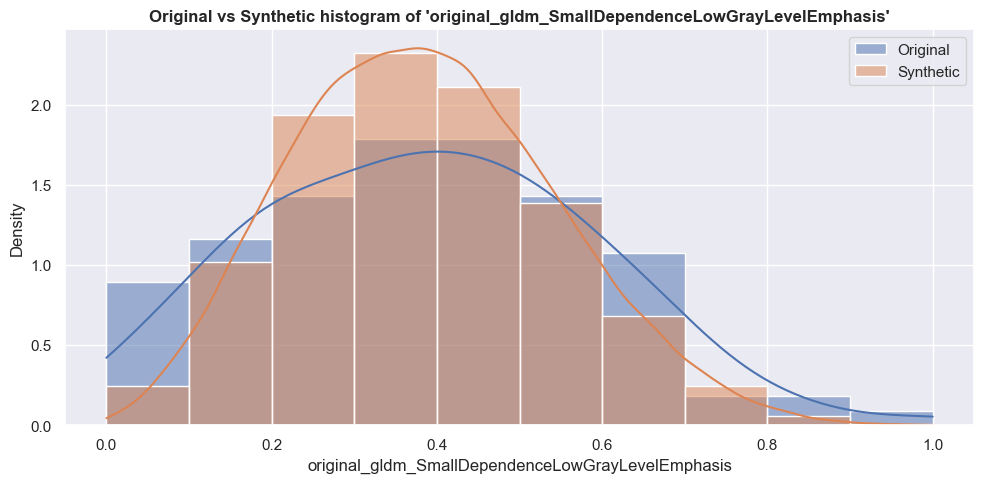

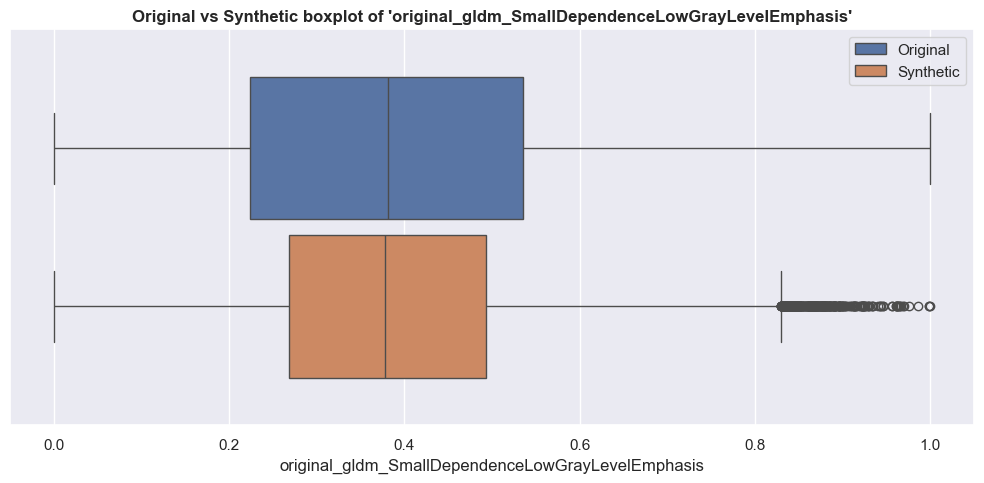

In [190]:
feature = 'original_gldm_SmallDependenceLowGrayLevelEmphasis'

uplot.sdg_histogram(
    data1=X_0_norm, data2=X_0_vm_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_0_norm, data2=X_0_vm_norm, 
    feature1=feature, feature2=feature)

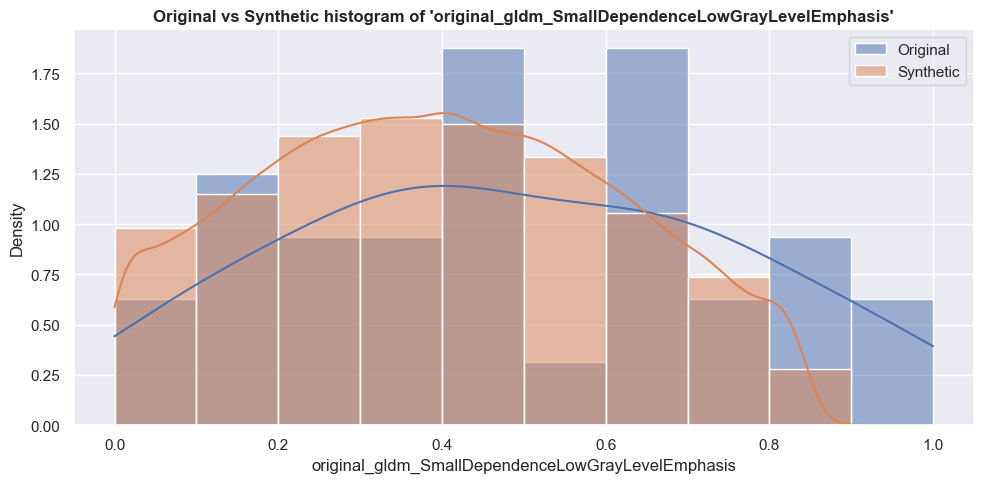

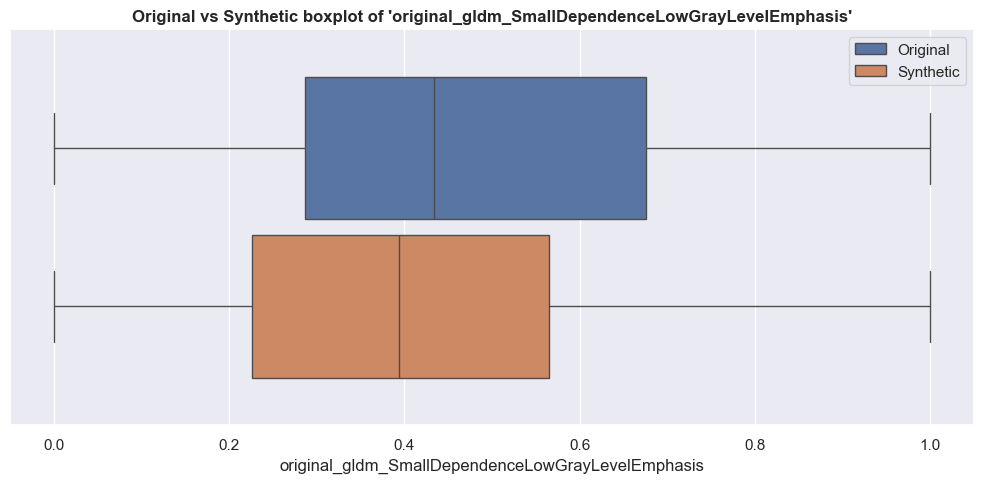

In [192]:
feature = 'original_gldm_SmallDependenceLowGrayLevelEmphasis'

uplot.sdg_histogram(
    data1=X_1_norm, data2=X_1_vm_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_1_norm, data2=X_1_vm_norm, 
    feature1=feature, feature2=feature)

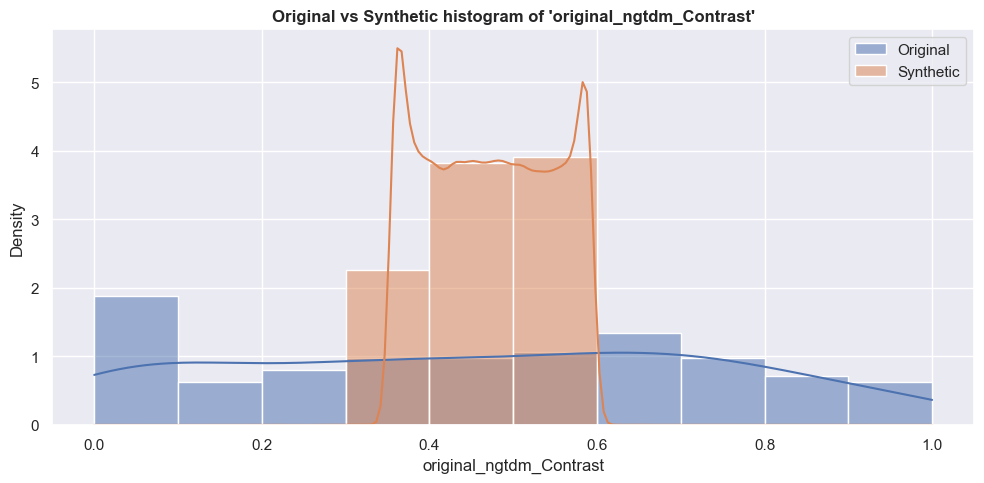

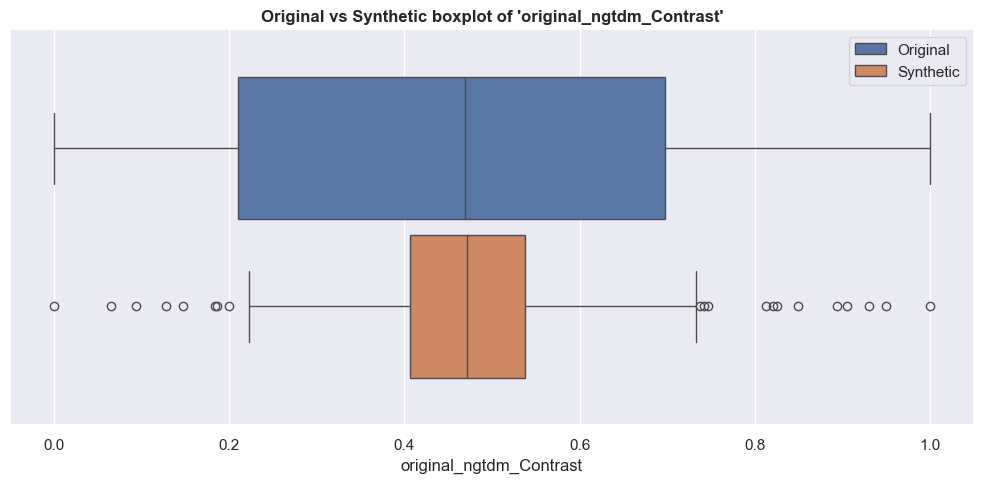

In [174]:
# Plot histograms and boxplots
feature = 'original_ngtdm_Contrast'

uplot.sdg_histogram(
    data1=X_0_norm, data2=X_0_vm_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_0_norm, data2=X_0_vm_norm, 
    feature1=feature, feature2=feature)

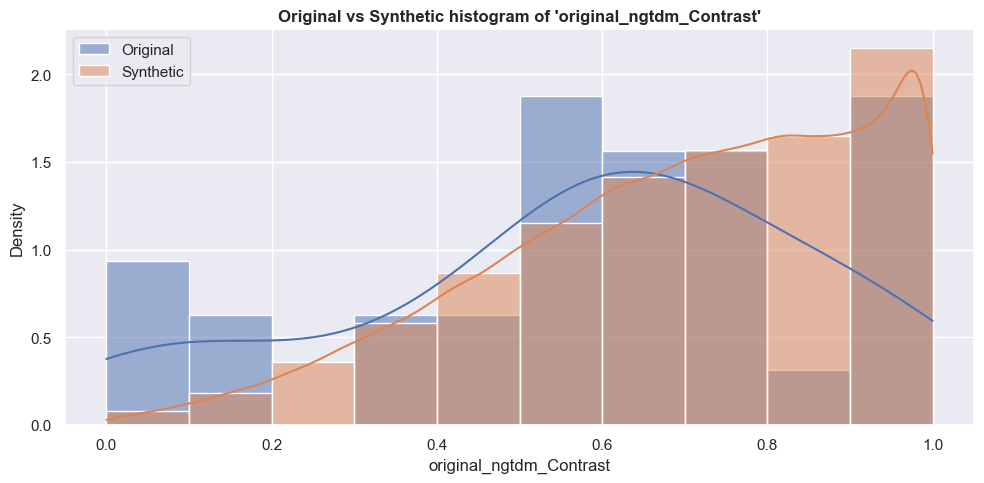

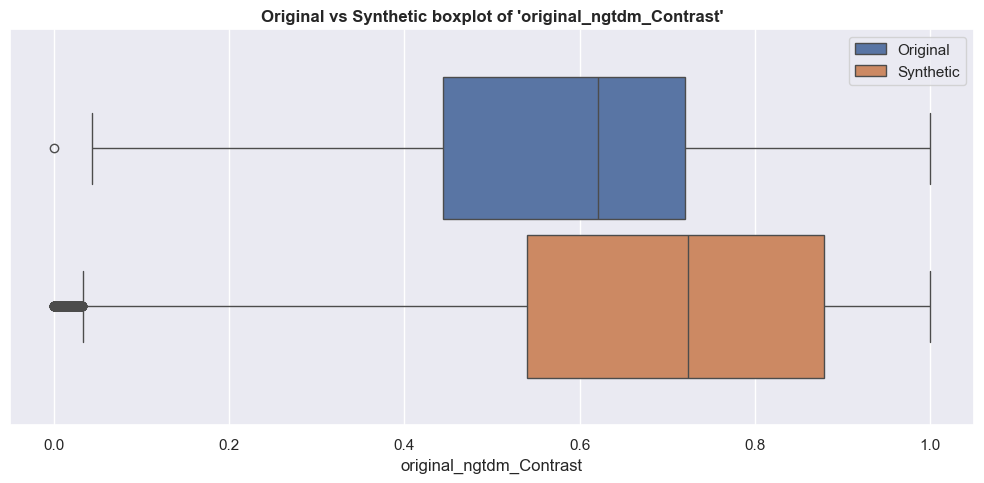

In [176]:
# Plot histograms and boxplots
feature = 'original_ngtdm_Contrast'

uplot.sdg_histogram(
    data1=X_1_norm, data2=X_1_vm_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_1_norm, data2=X_1_vm_norm, 
    feature1=feature, feature2=feature)

In [177]:
pd.set_option('display.max_rows', 10)

# Compare correlation coefficients
corr_compare_0 = u.corr_compare(X_0_norm, X_0_vm_norm)
corr_compare_0

,feat_1,feat_2,corr_coeff,corr_coeff
0,original_shape_Flatness,original_shape_LeastAxisLength,0.236025,0.224456
1,original_shape_Flatness,original_shape_Maximum2DDiameterColumn,-0.092704,-0.082472
2,original_shape_Flatness,original_shape_Maximum2DDiameterRow,-0.099304,-0.069424
3,original_shape_Flatness,original_shape_Maximum2DDiameterSlice,-0.100042,-0.080678
4,original_shape_Flatness,original_shape_Maximum3DDiameter,-0.178763,-0.152160
...,...,...,...,...
1373,original_glszm_ZoneVariance,original_ngtdm_Contrast,-0.296685,-0.221617
1374,original_glszm_ZoneVariance,original_ngtdm_Strength,-0.102730,-0.014731
1375,original_ngtdm_Busyness,original_ngtdm_Contrast,0.059677,0.064231
1376,original_ngtdm_Busyness,original_ngtdm_Strength,-0.109776,-0.023282


In [178]:
pd.set_option('display.max_rows', 10)

# Compare correlation coefficients
corr_compare_1 = u.corr_compare(X_1_norm, X_1_vm_norm)
corr_compare_1

,feat_1,feat_2,corr_coeff,corr_coeff
0,original_shape_Flatness,original_shape_Maximum2DDiameterRow,-0.086662,-0.048568
1,original_shape_Flatness,original_shape_Maximum2DDiameterSlice,-0.031816,-0.016783
2,original_shape_Flatness,original_shape_Maximum3DDiameter,-0.087075,-0.060244
3,original_shape_Flatness,original_shape_MinorAxisLength,0.108761,0.120543
4,original_shape_Flatness,original_shape_Sphericity,0.358739,0.315451
...,...,...,...,...
1220,original_ngtdm_Busyness,original_ngtdm_Contrast,-0.025929,-0.004511
1221,original_ngtdm_Busyness,original_ngtdm_Strength,-0.251394,-0.017447
1222,original_ngtdm_Complexity,original_ngtdm_Contrast,0.912432,0.906012
1223,original_ngtdm_Complexity,original_ngtdm_Strength,0.049106,0.043041


In [179]:
# Check one of the worst replicated correlations
cond_0 = (corr_compare_0['feat_1'] == 'original_ngtdm_Contrast') \
     & (corr_compare_0['feat_2'] == 'original_ngtdm_Strength') 

corr_compare_0.loc[cond_0]

,feat_1,feat_2,corr_coeff,corr_coeff
1377,original_ngtdm_Contrast,original_ngtdm_Strength,-0.256378,-0.102431


In [180]:
# Check one of the worst replicated correlations
cond_1 = (corr_compare_1['feat_1'] == 'original_ngtdm_Contrast') \
     & (corr_compare_1['feat_2'] == 'original_ngtdm_Strength') 

corr_compare_1.loc[cond_1]

,feat_1,feat_2,corr_coeff,corr_coeff
1224,original_ngtdm_Contrast,original_ngtdm_Strength,-0.134168,-0.087277


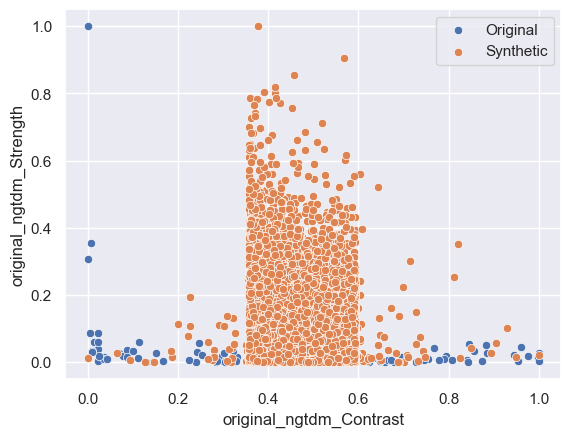

In [181]:
sns.scatterplot(data=X_0_norm, x='original_ngtdm_Contrast', y='original_ngtdm_Strength', label='Original')
sns.scatterplot(data=X_0_vm_norm, x='original_ngtdm_Contrast', y='original_ngtdm_Strength', label='Synthetic')
plt.legend()
plt.show()

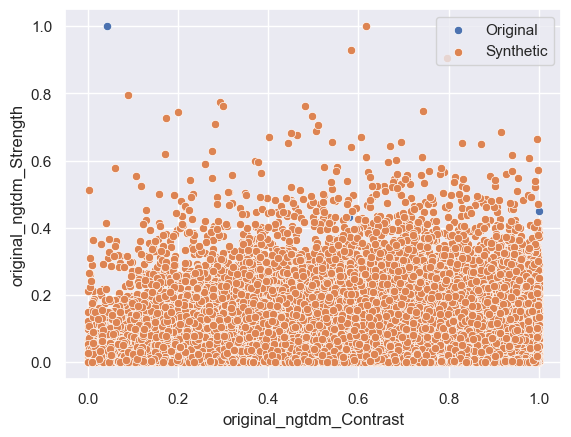

In [182]:
sns.scatterplot(data=X_1_norm, x='original_ngtdm_Contrast', y='original_ngtdm_Strength', label='Original')
sns.scatterplot(data=X_1_vm_norm, x='original_ngtdm_Contrast', y='original_ngtdm_Strength', label='Synthetic')
plt.legend()
plt.show()